In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import scipy.stats as stats 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

## Data Loading

In [3]:
# Reading data

data = pd.read_csv('as1-bank.csv')

In [4]:
# Having a look

data.head(10)

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,1,2,no,882,no,no,1,39,1,151,3,0,no
1,42,0,1,no,-247,yes,yes,1,519,1,166,1,2,yes
2,33,1,1,no,3444,yes,no,1,144,1,91,4,0,yes
3,36,1,2,no,2415,yes,no,1,73,1,86,4,2,no
4,36,1,2,no,0,yes,no,1,140,1,143,3,0,yes
5,44,1,1,no,1324,yes,no,1,119,1,89,2,2,no
6,26,0,2,no,172,no,yes,1,21,1,140,4,2,no
7,51,0,1,no,3132,no,no,1,449,1,176,1,0,no
8,33,2,1,no,1005,yes,no,1,175,1,174,2,0,no
9,30,1,1,no,873,yes,no,1,119,1,167,3,1,no


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'marital'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'contact'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>],
       [<AxesSubplot:title={'center':'poutcome'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

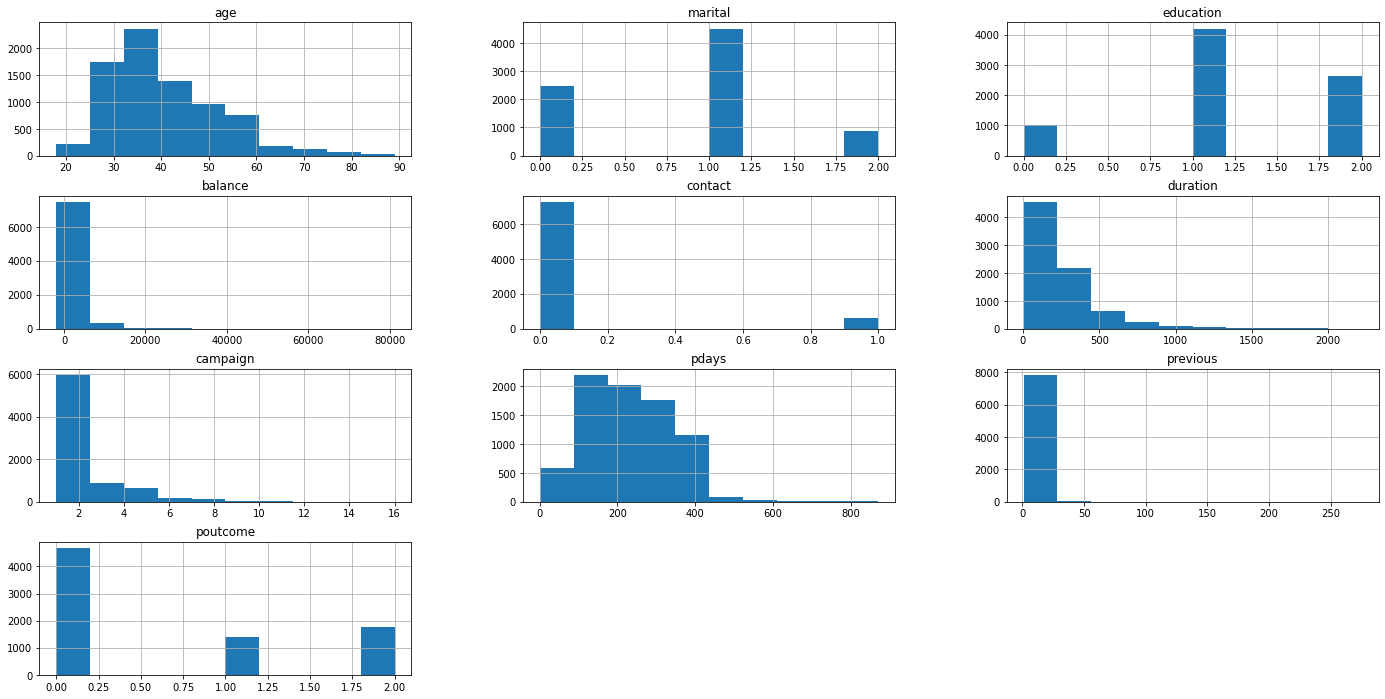

In [5]:
# Visualization of data using histogram

plt.rcParams["figure.figsize"] = (24, 12)
data.hist()

## Data Pre-Processing

In [7]:
# handling missing values
data.isnull().sum()  #No null values

age          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# To check duplicated values
print(data.duplicated().value_counts()) 

False    7842
dtype: int64


## Feature Selection

In [10]:
# This is to handle categorical data

from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()

In [11]:
# getting a copy of data to clean it.

xa_Encode = data.copy()
xa_Encode.isnull().sum()

age          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
# Chaning categorical values into numberical

features = ['default' ,'housing', 'loan','month', 'y','contact','education','poutcome','marital','job']
feature_label_dict = {
                  'default':{'no':0,'yes':1},
                  'housing':{'no':0,'yes':1},
                  'loan':{'no':0,'yes':1},
                  'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},
                  'y':{'no':0,'yes':1},
                  'contact':{'unknown':0, 'cellular':1, 'telephone':2},
                  'education':{'unknown':0, 'primary':1, 'secondary':2,'tertiary':3},
                  'poutcome':{'unknown':0,  'other':1, 'failure':2, 'success':3},
                  'marital':{  'divorced':0,'single':1,'married':2},
                  'job':{'unknown':0,'unemployed':1, 'student':2,'management':3, 'technician':4, 'entrepreneur':5, 'blue-collar':6, 'retired':7, 'admin.':8, 'services':9, 'self-employed':10, 'housemaid':11}
                 }
for f in features:     
  xa_Encode = xa_Encode.replace({f:feature_label_dict[f]})
  
  print ("Labelled as: ",feature_label_dict[f])


Labelled as:  {'no': 0, 'yes': 1}
Labelled as:  {'no': 0, 'yes': 1}
Labelled as:  {'no': 0, 'yes': 1}
Labelled as:  {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
Labelled as:  {'no': 0, 'yes': 1}
Labelled as:  {'unknown': 0, 'cellular': 1, 'telephone': 2}
Labelled as:  {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
Labelled as:  {'unknown': 0, 'other': 1, 'failure': 2, 'success': 3}
Labelled as:  {'divorced': 0, 'single': 1, 'married': 2}
Labelled as:  {'unknown': 0, 'unemployed': 1, 'student': 2, 'management': 3, 'technician': 4, 'entrepreneur': 5, 'blue-collar': 6, 'retired': 7, 'admin.': 8, 'services': 9, 'self-employed': 10, 'housemaid': 11}


In [13]:
# checking cleaned data

xa_Encode.head(10)

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,1,2,0,882,0,0,1,39,1,151,3,0,0
1,42,0,1,0,-247,1,1,1,519,1,166,1,2,1
2,33,1,1,0,3444,1,0,1,144,1,91,4,0,1
3,36,1,2,0,2415,1,0,1,73,1,86,4,2,0
4,36,1,2,0,0,1,0,1,140,1,143,3,0,1
5,44,1,1,0,1324,1,0,1,119,1,89,2,2,0
6,26,0,2,0,172,0,1,1,21,1,140,4,2,0
7,51,0,1,0,3132,0,0,1,449,1,176,1,0,0
8,33,2,1,0,1005,1,0,1,175,1,174,2,0,0
9,30,1,1,0,873,1,0,1,119,1,167,3,1,0


In [36]:
# getting features and label
X = pd.DataFrame(xa_Encode.iloc[:,:-1])
y_true = pd.DataFrame(xa_Encode.iloc[:,-1:])

## Dealing with Class Imbalance

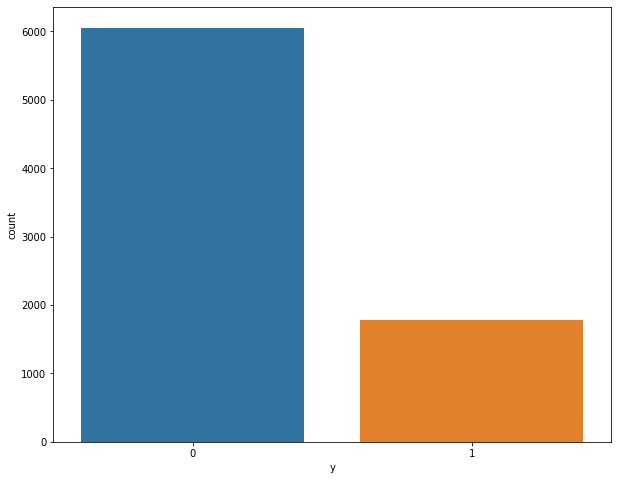

In [37]:
# To check class imbalance

import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 8)
xa_Encode['y'].value_counts()
sns.countplot(x='y', data=xa_Encode)
plt.show()

In [39]:
# To deal with class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_class_train, X_test, y_class_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=0)
columns = X_class_train.columns
data_X, data_y = os.fit_resample(X_class_train, y_class_train)
smoted_X = pd.DataFrame(data=data_X,columns=columns )
smoted_y= pd.DataFrame(data=data_y,columns=['y'])

## Making data ready for training

In [43]:
X = smoted_X
Y = smoted_y

In [44]:
# splitting data into train test data
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size=0.2)

In [45]:
# To scale our data
sc_X = StandardScaler()
sc_X.fit(X_train)
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [47]:
# To get the columns name to make the scaled output as data frame,
columns_value_new=X_train.columns
test_X_Scaled_Except = pd.DataFrame(X_trainscaled, columns=columns_value_new)

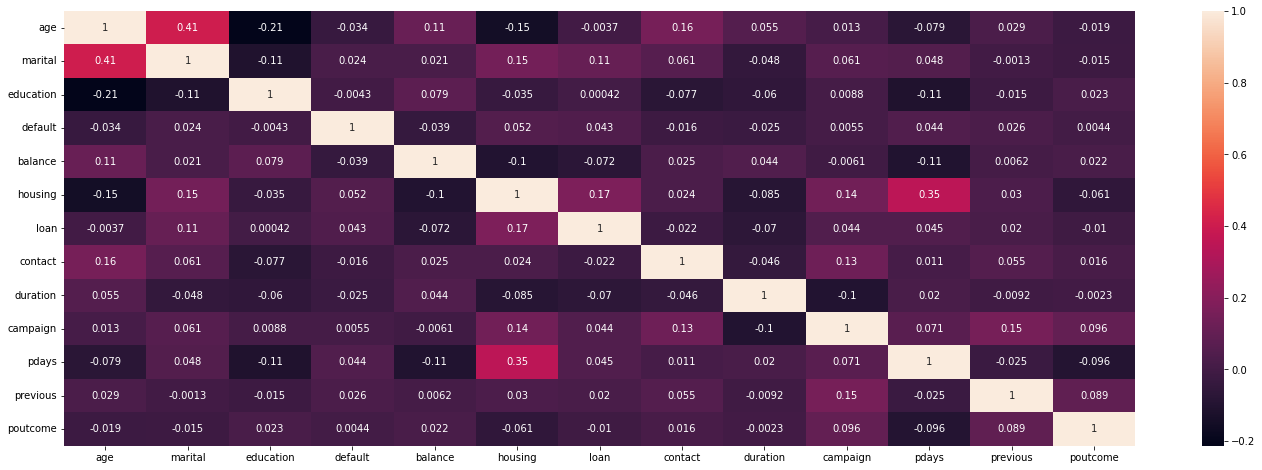

In [48]:
# Identify significant and independent features using correlation matrix without target variable
import seaborn as sns
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(test_X_Scaled_Except.corr(),annot=True);

In [50]:
# Doing PCA

from sklearn.decomposition import PCA
PCA_data_train =X_trainscaled
PCA_data_test =X_testscaled
pca = PCA(n_components=13)
pca.fit(PCA_data_train)
X_pca_train= pca.fit_transform(PCA_data_train) 
X_pca_test= pca.fit_transform(PCA_data_test) 
principalDf_train = pd.DataFrame(data = X_pca_train)
principalDf_test = pd.DataFrame(data = X_pca_test)

In [51]:
# to check principal df for training
principalDf_train.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.743491,1.207010,1.080025,-1.609886,2.179511,-0.757388,-2.146067,-0.072955,1.112365,1.640053,-0.409255,-1.081875,-1.046708
1,-0.124268,-1.784959,-0.324702,1.485186,0.591321,0.417385,-0.657132,-1.813339,0.562098,0.435761,0.754769,-0.012217,-0.352043
2,-0.745833,-1.465073,1.334114,0.471290,0.468644,0.509407,-0.614760,-1.038937,0.309875,-0.590839,0.847504,-0.468316,-0.979778
3,1.812612,-1.135204,-0.542714,-1.959416,-0.015222,0.228069,-0.959873,0.650614,1.388317,0.853277,-0.704629,-0.080597,0.374984
4,-0.562920,0.320420,-0.735116,-0.534235,-0.319279,-0.458703,0.351818,0.280537,-0.537531,0.316363,-0.024216,0.146666,0.905085
5,-0.220849,-1.211927,-1.991269,1.777603,0.011339,1.200295,-0.119330,0.159502,0.962667,-0.549800,-0.088986,-0.489906,-0.567413
6,3.711727,2.410265,5.438020,2.276343,-1.933855,-0.922373,0.473845,-2.016095,2.034139,-3.120804,-3.984291,-1.049329,-0.908893
7,-0.933147,0.813910,1.469606,-0.395098,1.383712,-1.018273,-0.675133,-0.416287,-0.807393,0.490422,1.012664,-0.339276,0.524273
8,2.338100,0.290445,-0.433889,1.492249,-2.043020,-2.115791,1.548222,-0.196671,1.908617,1.243689,1.443882,-0.753743,1.227751
9,0.223144,0.039622,4.000390,-0.394738,-0.562378,-0.115715,-0.353650,-1.921888,-0.659197,-2.105667,-3.147244,0.205986,0.623321


## Creating model 1

In [73]:
from sklearn.neural_network import MLPClassifier 
clf = MLPClassifier(hidden_layer_sizes=(16,8,4), solver='sgd',random_state=1).fit(principalDf_train, y_train)
y_pred=clf.predict(principalDf_test)
print(clf.score(principalDf_test, y_test))

/home/munsif/Notebook/JupyterEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7893192488262911


/home/munsif/Notebook/JupyterEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [74]:
# to see the accuracy of model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       851
           1       0.77      0.82      0.80       853

    accuracy                           0.79      1704
   macro avg       0.79      0.79      0.79      1704
weighted avg       0.79      0.79      0.79      1704



/home/munsif/Notebook/JupyterEnv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


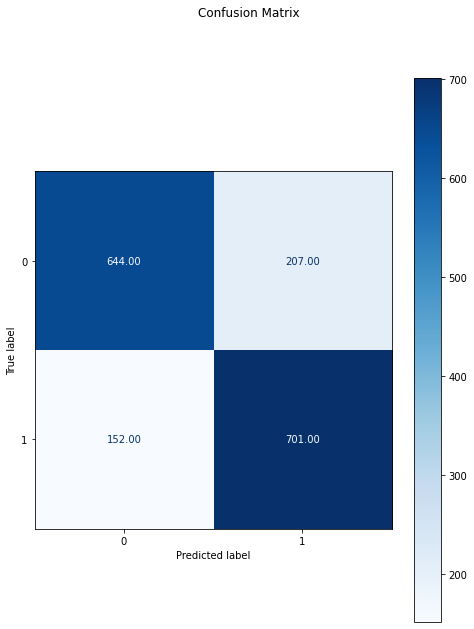

In [75]:
# To see confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf, principalDf_test, y_test,display_labels=["0",'1'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix ")
plt.show()

## Creating model 2

In [76]:
from sklearn.neural_network import MLPClassifier 
clf = MLPClassifier(hidden_layer_sizes=(8,4,2), solver='sgd',random_state=1).fit(principalDf_train, y_train)
y_pred=clf.predict(principalDf_test)
print(clf.score(principalDf_test, y_test))

/home/munsif/Notebook/JupyterEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8174882629107981


/home/munsif/Notebook/JupyterEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [78]:
# to see the accuracy of model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       851
           1       0.82      0.81      0.82       853

    accuracy                           0.82      1704
   macro avg       0.82      0.82      0.82      1704
weighted avg       0.82      0.82      0.82      1704



/home/munsif/Notebook/JupyterEnv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


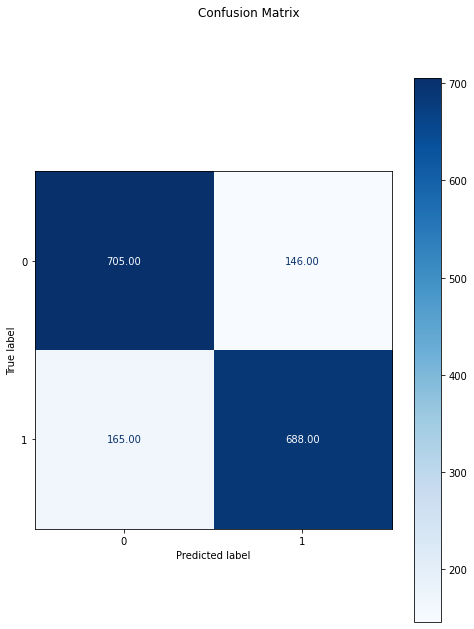

In [79]:
# To see confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf, principalDf_test, y_test,display_labels=["0",'1'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix ")
plt.show()

## Conclusion
We loaded our data, pre-processed it, dealt with categorical data using labelEncoder, dealt with class imbalance using SMOTE, scaled our data to get better results, used PCA(Principal Component Analysis) to do dimension reduction, used Multi-layer Perceptron a feed forward neural network to train on our data. We tried different number of layers and number of nodes in a layer and finally got 81% accuracy. Then at the end we evaluated our model.